In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/Projects/Python/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


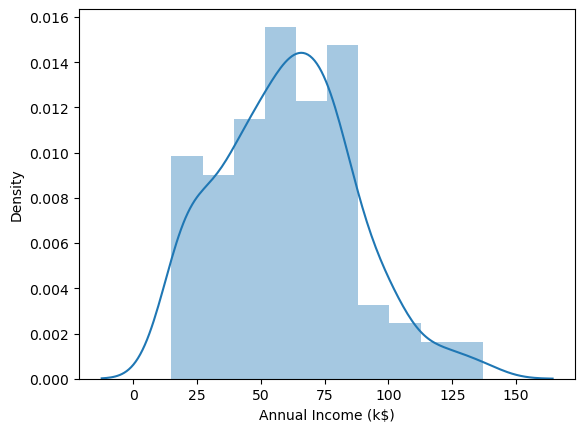

In [6]:
sb.distplot(df['Annual Income (k$)']);

In [7]:
# we will be use for loop too go over all the column

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

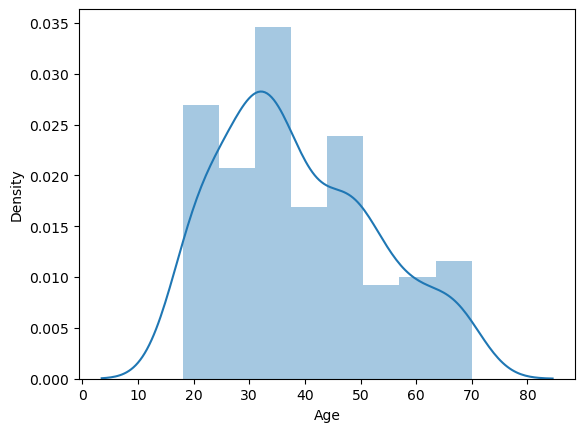

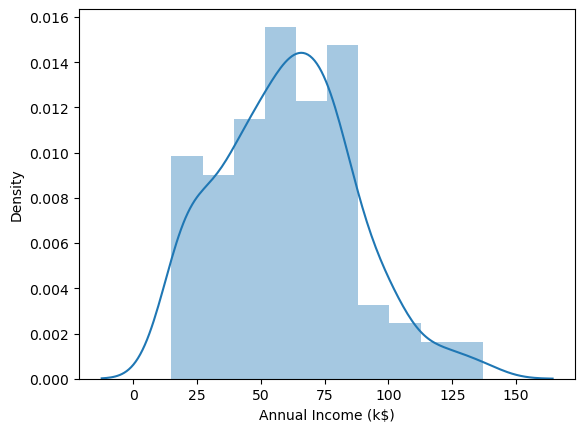

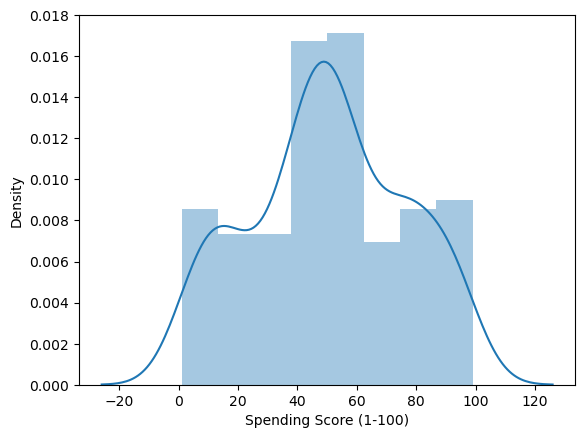

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    mpl.figure()
    sb.distplot(df[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

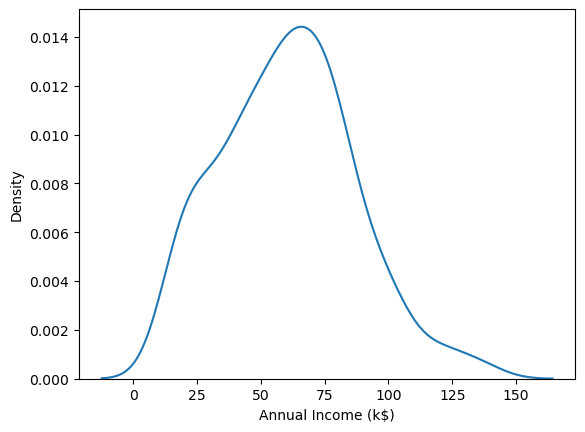

In [10]:
sb.kdeplot(df['Annual Income (k$)'])

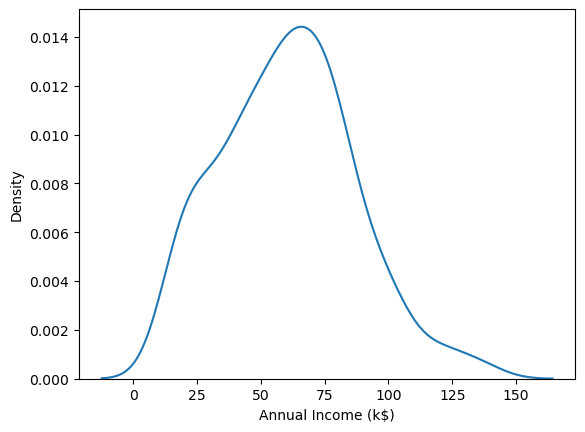

In [11]:
sb.kdeplot(df['Annual Income (k$)']);

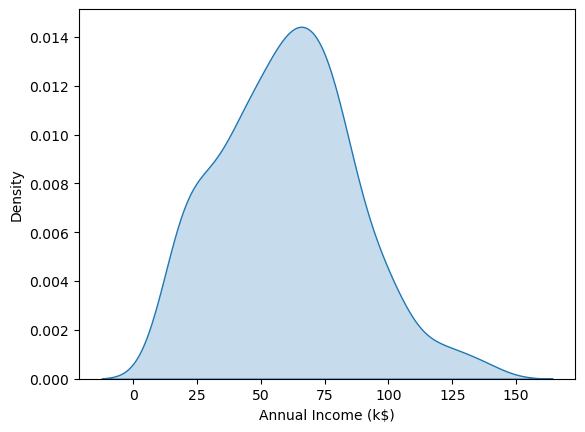

In [12]:
sb.kdeplot(df['Annual Income (k$)'],shade=True);

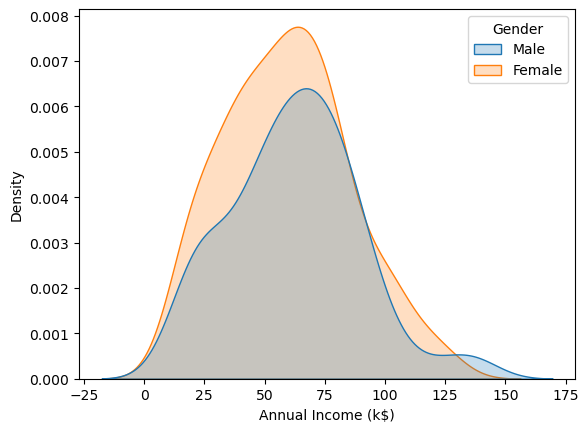

In [13]:
sb.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

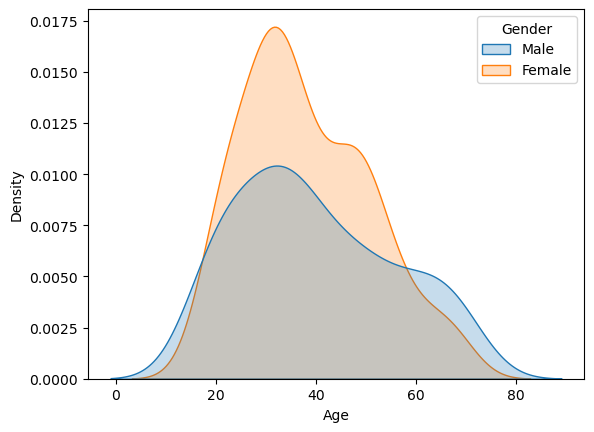

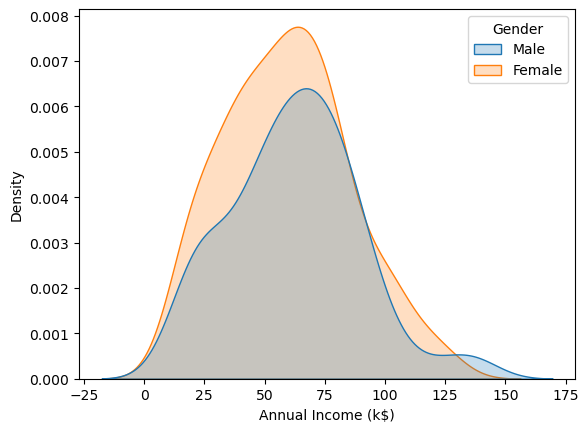

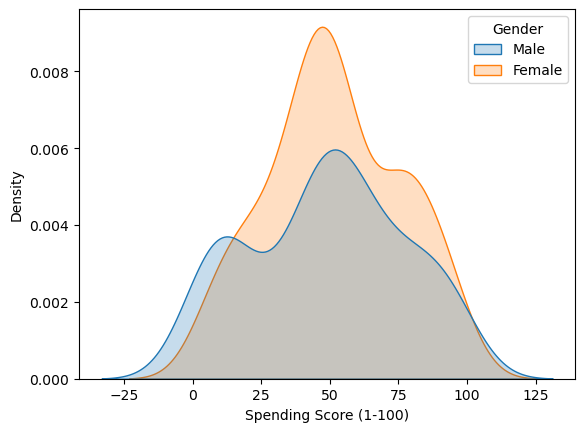

In [14]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    mpl.figure()
    sb.kdeplot(df[i],shade=True,hue=df['Gender'])

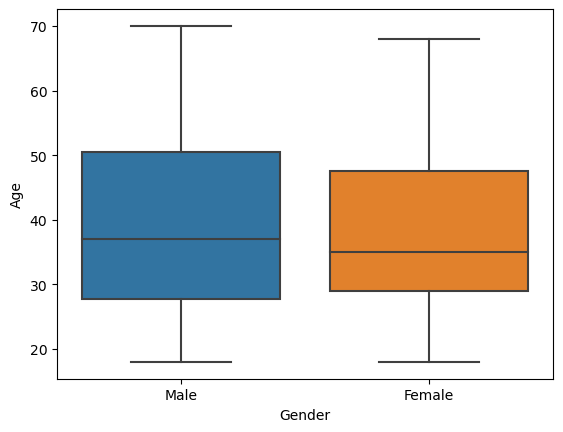

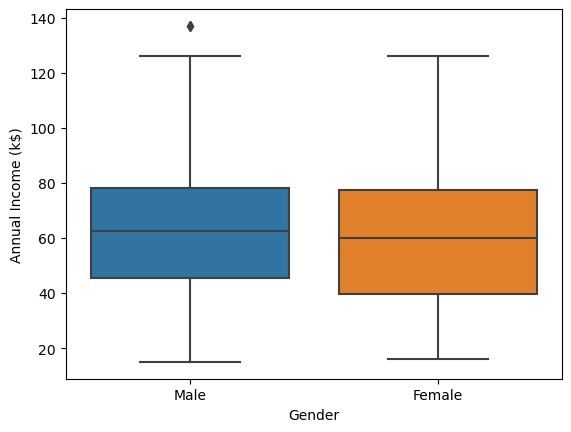

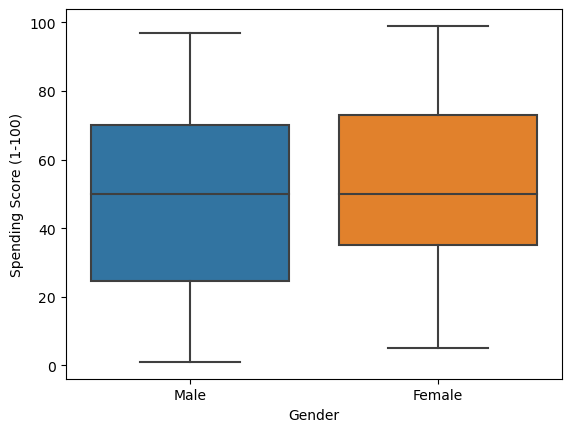

In [15]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    mpl.figure()
    sb.boxplot(data=df,x='Gender',y=df[i])

In [17]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [18]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

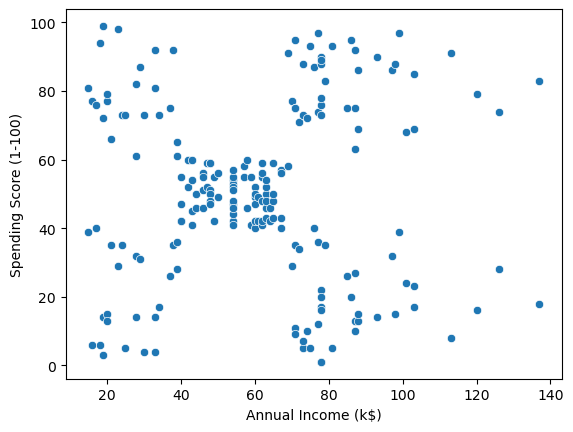

In [20]:
sb.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

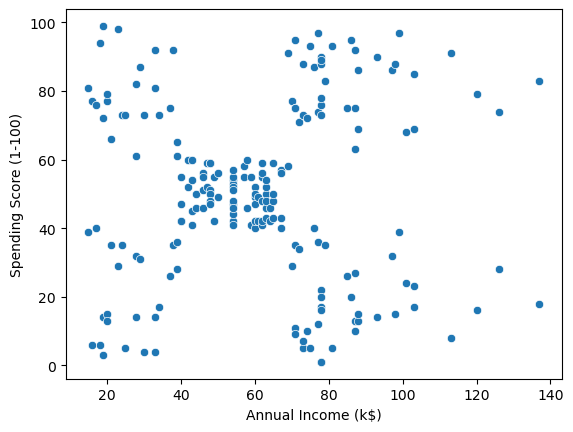

In [21]:
sb.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

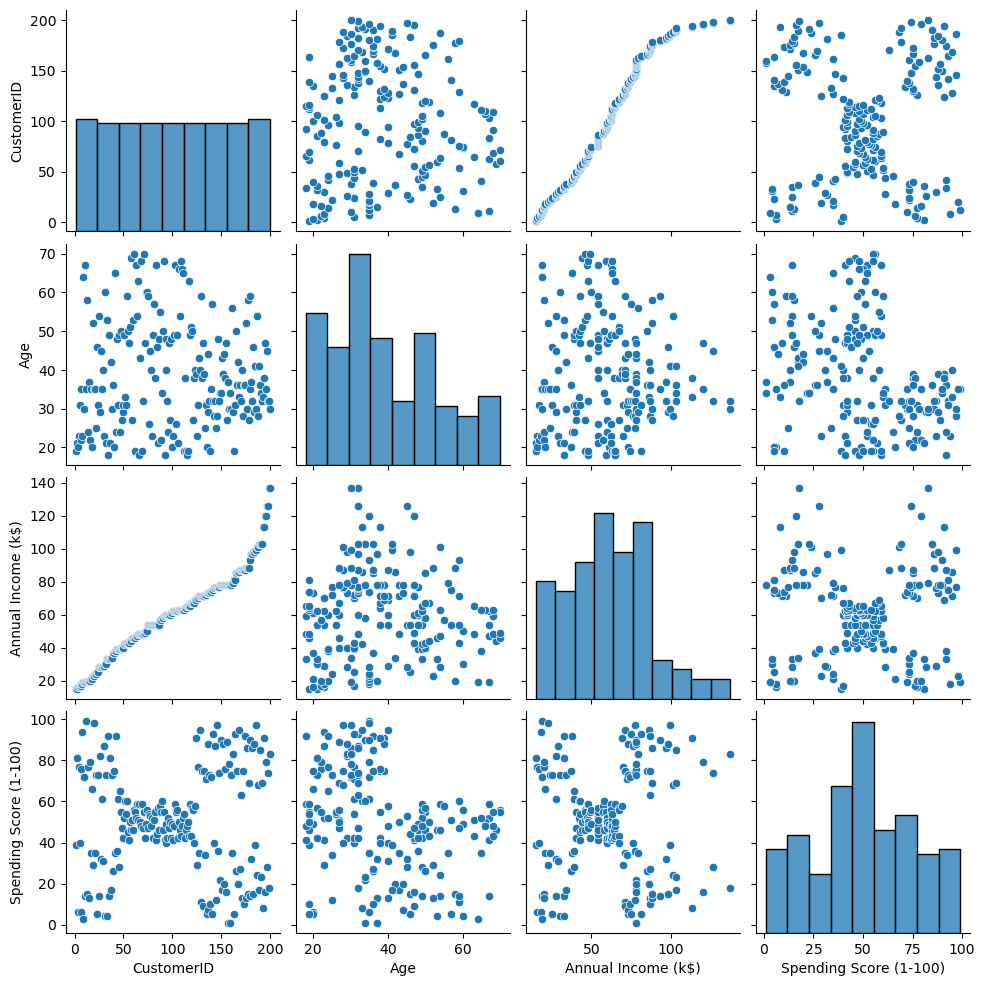

In [23]:
sb.pairplot(df);

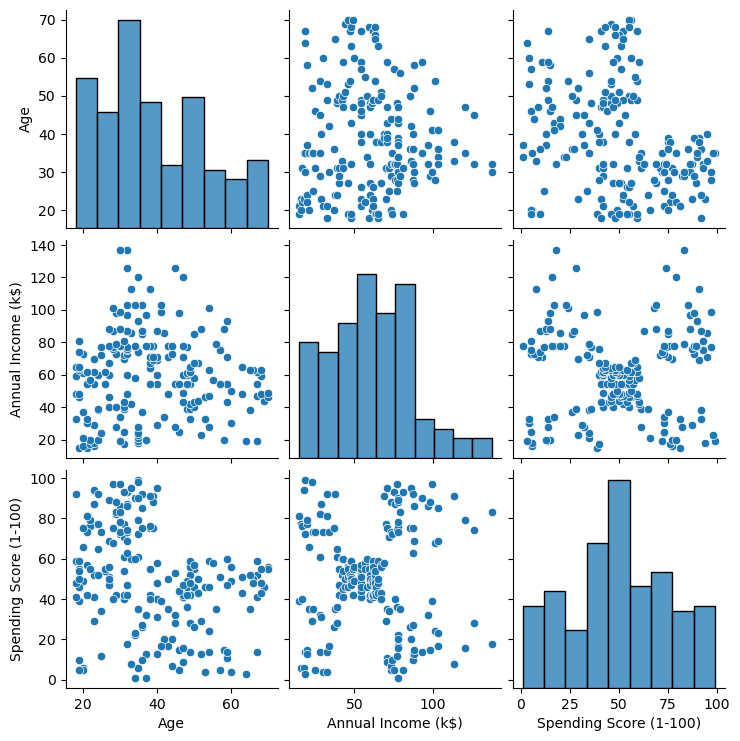

In [24]:
df=df.drop('CustomerID',axis=1)
sb.pairplot(df)

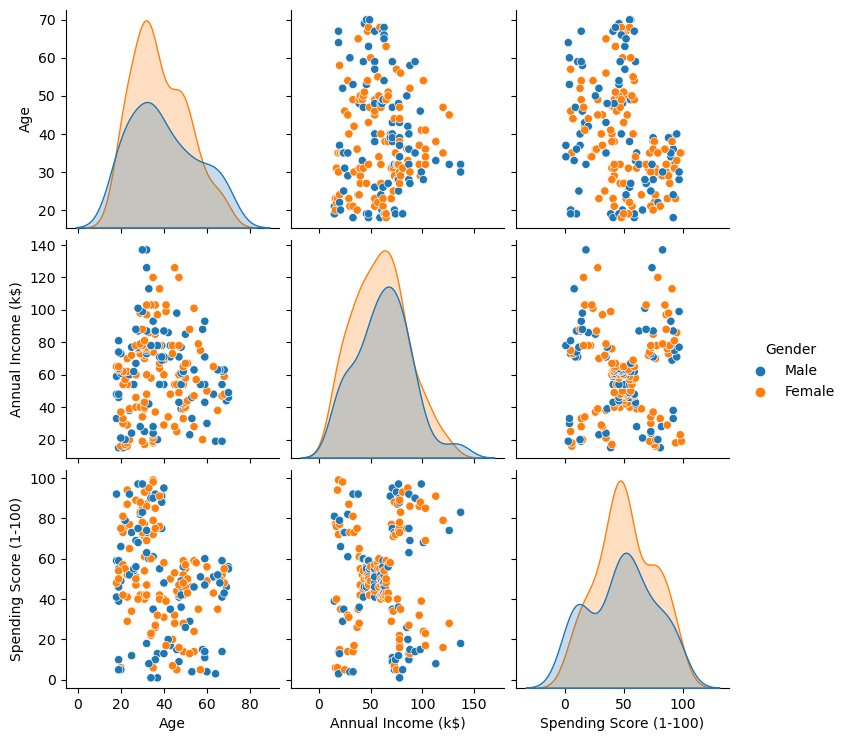

In [26]:
sb.pairplot(df,hue='Gender');

In [27]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


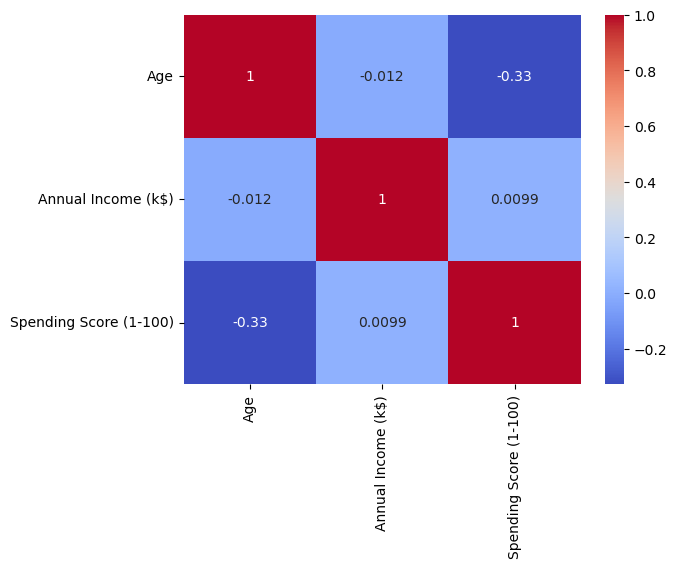

In [30]:
sb.heatmap(df.corr(),annot=True,cmap='coolwarm');

# Univariate Clustering

In [31]:
clustering1 = KMeans()

In [33]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [34]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2])

In [35]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [36]:
df['Income Cluster'].value_counts()

0    42
6    36
1    32
3    28
5    26
7    16
4    14
2     6
Name: Income Cluster, dtype: int64

In [48]:
clustering1 = KMeans(n_clusters = 3)
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [49]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [50]:
clustering1.inertia_

23517.330930930933

In [51]:
# elbow method

In [52]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [53]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3950.212698412699,
 2822.4996947496948,
 2168.4787157287155,
 1799.5064935064934]

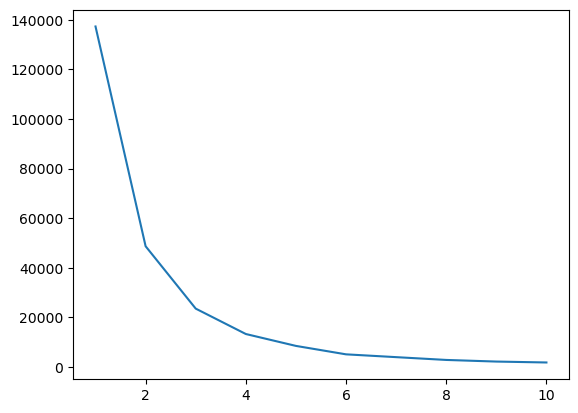

In [54]:
mpl.plot(range(1,11),inertia_scores)

In [56]:
#no. of cluster is looks like 3 so go above and give 3

In [57]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [58]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Analysis

In [59]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


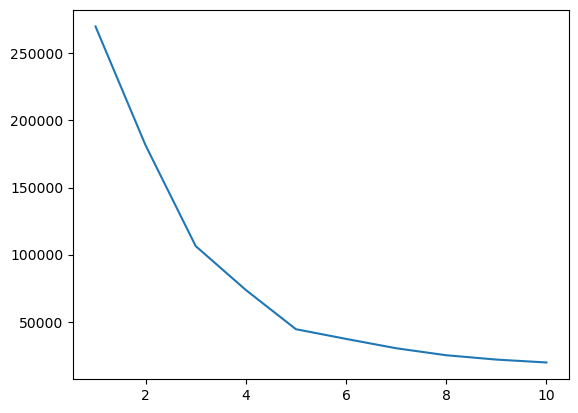

In [61]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
mpl.plot(range(1,11),inertia_scores2);

In [62]:
#it showed that cluster is at 5

In [63]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,2
2,Female,20,16,6,0,4
3,Female,23,16,77,0,2
4,Female,31,17,40,0,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

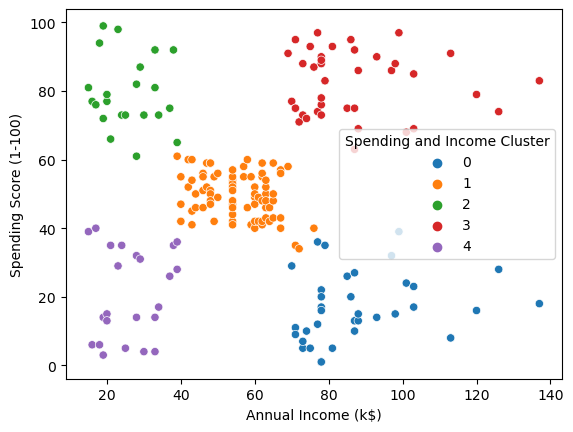

In [66]:
sb.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [74]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

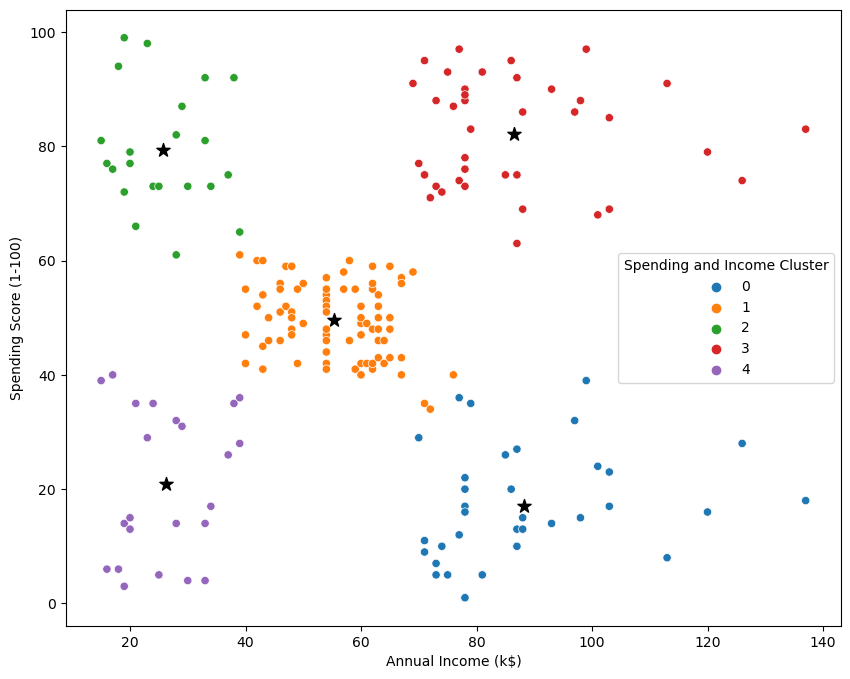

In [76]:
mpl.figure(figsize=(10,8))
mpl.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sb.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [77]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,16,19
1,48,33
2,13,9
3,21,18
4,14,9


In [78]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


In [79]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043
